<a href="https://colab.research.google.com/github/ykedarinath/Guvi_task_7/blob/main/Assignment_10_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

# Importing datasets

In [ ]:
train = pd.read_csv("/content/trainKNN.txt",names=["Id","RI","Na","Mg","AI","Si","K","Ca","Ba","Fe","Type_of_Glass"])
train.tail()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type_of_Glass
191,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
195,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7


In [ ]:
test = pd.read_csv("/content/testKNN.txt",names=["Id","RI","Na","Mg","AI","Si","K","Ca","Ba","Fe","Type_of_Glass"])
test.head()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type_of_Glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [ ]:
print(train.shape)
print(test.shape)

(196, 11)
(18, 11)


# Data cleaning

In [ ]:
print(train.isnull().sum())

Id               0
RI               0
Na               0
Mg               0
AI               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_Glass    0
dtype: int64


No null values in training data

In [ ]:
train.duplicated().sum() 

0

No duplicates in training data.

In [ ]:
train.dtypes 

Id                 int64
RI               float64
Na               float64
Mg               float64
AI               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_Glass      int64
dtype: object

**Dropping unnecessary columns in train and test data**

In [ ]:
train.drop("Id",axis=1,inplace=True)
del test['Id']
train.describe()

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type_of_Glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


# EDA

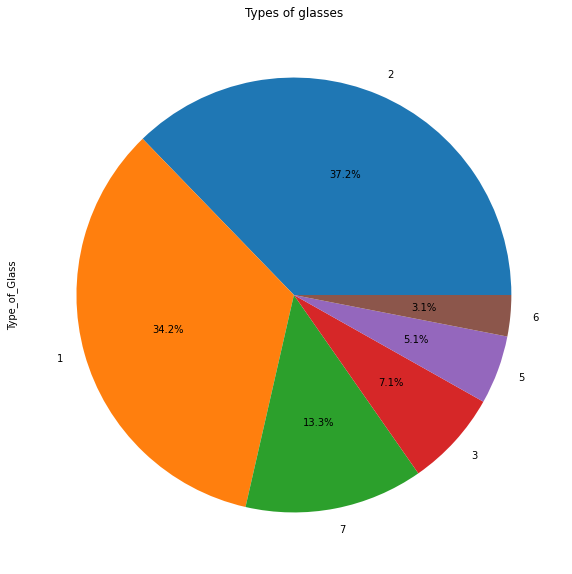

In [ ]:
plt.figure(1, figsize=(10,10))
plt.title("Types of glasses")
train['Type_of_Glass'].value_counts().plot.pie(autopct="%0.1f%%")

In [ ]:
train[(train['Fe']== 0)].shape
train[(train['Ba']== 0)].shape 

(163, 10)

# Data Preparation

In [ ]:
X_train = train.drop(columns=['Type_of_Glass',],axis=1)
X_test = test.drop(columns=['Type_of_Glass',],axis=1)

In [ ]:
y_train = train['Type_of_Glass']
y_test = test['Type_of_Glass']

# Scaling the data

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Hyper parameter tuning

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " cross_val score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


K value  :  1  train score :  1.0  cross_val score :  0.6678947368421053
K value  :  2  train score :  0.8418367346938775  cross_val score :  0.7194736842105264
K value  :  3  train score :  0.8520408163265306  cross_val score :  0.6834210526315789
K value  :  4  train score :  0.7959183673469388  cross_val score :  0.6892105263157895
K value  :  5  train score :  0.8010204081632653  cross_val score :  0.6786842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


K value  :  6  train score :  0.7806122448979592  cross_val score :  0.6786842105263158
K value  :  7  train score :  0.7346938775510204  cross_val score :  0.653157894736842
K value  :  8  train score :  0.7551020408163265  cross_val score :  0.6634210526315789
K value  :  9  train score :  0.7244897959183674  cross_val score :  0.6526315789473685
K value  :  10  train score :  0.7142857142857143  cross_val score :  0.6581578947368422
K value  :  20  train score :  0.6938775510204082  cross_val score :  0.5813157894736843
K value  :  50  train score :  0.6224489795918368  cross_val score :  0.5060526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


# Euclidean Metric

In [ ]:
euc_model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')  
euc_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
euclid_pred = euc_model.predict(X_test_scaled)
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100

print("Accuracy Score of Euclidean Metric is:",euclid_score)

Accuracy Score of Euclidean Metric is: 55.55555555555556


# Manhattan Metric

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='manhattan')  
classifier.fit(X_train_scaled, y_train) 

KNeighborsClassifier(metric='manhattan')

In [ ]:
manhat_pred = classifier.predict(X_test_scaled)
manhat_score= accuracy_score(y_test,manhat_pred)*100
print("Accuracy score of Manhattan metric:",manhat_score)

Accuracy score of Manhattan metric: 55.55555555555556


# Classification report

In [ ]:
clf_report = pd.DataFrame(classification_report(y_test, manhat_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                  1         2    3         5         6         7  accuracy  \
precision  0.428571  0.400000  0.0  1.000000  1.000000  0.750000  0.555556   
recall     1.000000  0.666667  0.0  0.333333  0.333333  1.000000  0.555556   
f1-score   0.600000  0.500000  0.0  0.500000  0.500000  0.857143  0.555556   
support    3.000000  3.000000  3.0  3.000000  3.000000  3.000000  0.555556   

           macro avg  weighted avg  
precision   0.596429      0.596429  
recall      0.555556      0.555556  
f1-score    0.492857      0.492857  
support    18.000000     18.000000  


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_report = pd.DataFrame(classification_report(y_test, euclid_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
              1         2    3         5         6         7  accuracy  \
precision  0.60  0.285714  0.0  1.000000  1.000000  0.750000  0.555556   
recall     1.00  0.666667  0.0  0.333333  0.333333  1.000000  0.555556   
f1-score   0.75  0.400000  0.0  0.500000  0.500000  0.857143  0.555556   
support    3.00  3.000000  3.0  3.000000  3.000000  3.000000  0.555556   

           macro avg  weighted avg  
precision   0.605952      0.605952  
recall      0.555556      0.555556  
f1-score    0.501190      0.501190  
support    18.000000     18.000000  


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
